In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('RC.csv')
f=df.freq.values
v1=df.mv1.values
v2=df.mv2.values

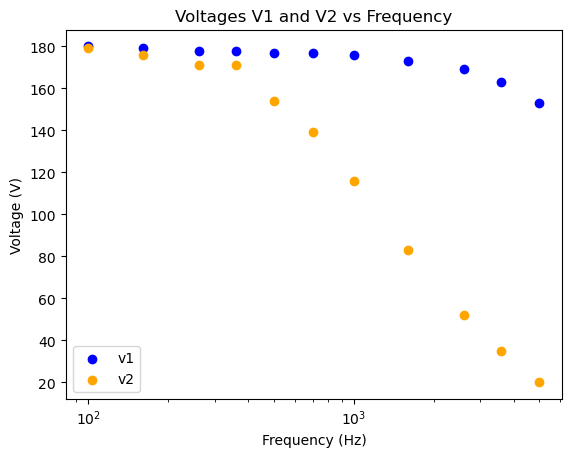

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
plt.scatter(f,v1, label='v1', color='blue')
plt.scatter(f,v2, label='v2', color='orange')
plt.xscale('log')
plt.title('Voltages V1 and V2 vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()
plt.savefig('Voltages V1 and V2 vs Frequency')

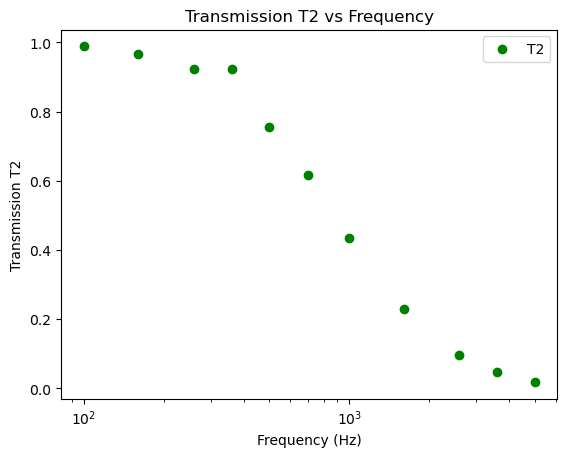

<Figure size 640x480 with 0 Axes>

In [4]:
T2=(v2/v1)**2
plt.scatter(f,T2, label='T2', color='green')
plt.xscale('log')
plt.title('Transmission T2 vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transmission T2')
plt.legend()
plt.show()
plt.savefig('Transmission T2 vs Frequency')

In [5]:
dT2=(2/(12**0.5))*(v2**4/v1**6+v2**2/v1**4)**0.5
print(dT2)

[0.00449838 0.00444756 0.00432089 0.00432089 0.00376183 0.00325705
 0.00258945 0.00177586 0.0010998  0.00077789 0.00049747]


In [6]:
from scipy.optimize import curve_fit
def RCfit1(f, a, c):
    return 1/(a+c*f**2)
p0=1,1.3e-6
popt,pcov=curve_fit(RCfit1, f, T2, p0, sigma=dT2)
print('a: ' +str(popt[0])+' c: '+str(popt[1]))
print('Errors(a,c): '+ str(np.sqrt(pcov.diagonal())))
print(popt+1.959964*np.sqrt(pcov.diagonal()))
print(popt-1.959964*np.sqrt(pcov.diagonal()))

a: 0.9719298242806563 c: 1.4031259591667893e-06
Errors(a,c): [2.30146239e-02 7.28395467e-08]
[1.01703766e+00 1.54588885e-06]
[9.26821990e-01 1.26036307e-06]


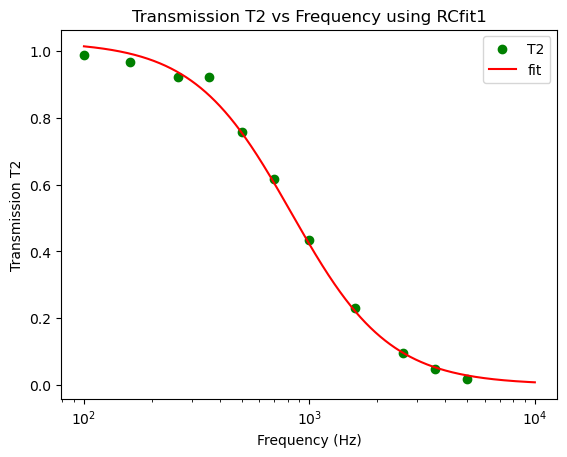

<Figure size 640x480 with 0 Axes>

In [7]:
newx=np.arange(100,10000,1)
yfit=1/(popt[0]+popt[1]*newx**2)
plt.scatter(f,T2, label='T2', color='green')
plt.xscale('log')
plt.title('Transmission T2 vs Frequency using RCfit1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transmission T2')
plt.plot(newx,yfit,'r',label='fit')
plt.xscale('log')
plt.legend()
plt.show()
plt.savefig('Transmission T2 vs Frequency using RCfit1')

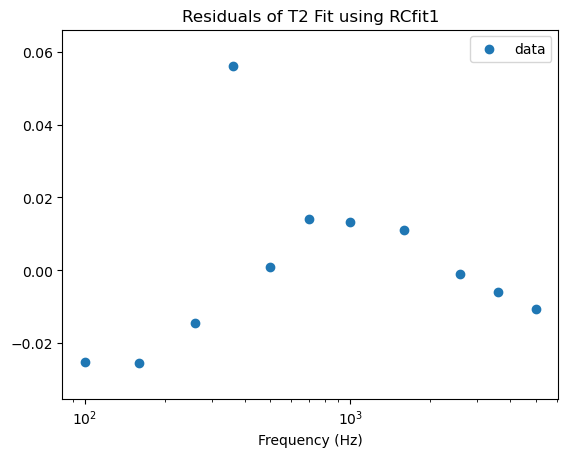

<Figure size 640x480 with 0 Axes>

In [10]:
fitatx=RCfit1(f,*popt)
res=T2-fitatx
plt.scatter(f,res,marker='o',label='data')
plt.xscale('log')
plt.ylim(min(res)-0.01,max(res)+0.01)
plt.title('Residuals of T2 Fit using RCfit1')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()
plt.savefig('Residuals of T2 Fit using RCfit1')

In [11]:
def RCfit2(f, a, b, c):
    return 1/(a+b*f+c*f**2)
p0=1,1.0e-6,1.3e-6
popt,pcov=curve_fit(RCfit2, f, T2, p0, sigma=dT2)
print('a: ' +str(popt[0]) + 'b: ' + str(popt[1]) + ' c: ' + str(popt[2]))
print('Errors(a,b,c): '+ str(np.sqrt(pcov.diagonal())))
print(popt+1.959964*np.sqrt(pcov.diagonal()))
print(popt-1.959964*np.sqrt(pcov.diagonal()))

a: 1.042602021860991b: -0.0003427076680967062 c: 1.623328312447154e-06
Errors(a,b,c): [3.79514792e-02 1.57700961e-04 1.25746010e-07]
[ 1.11698555e+00 -3.36194626e-05  1.86978597e-06]
[ 9.68218489e-01 -6.51795874e-04  1.37687066e-06]


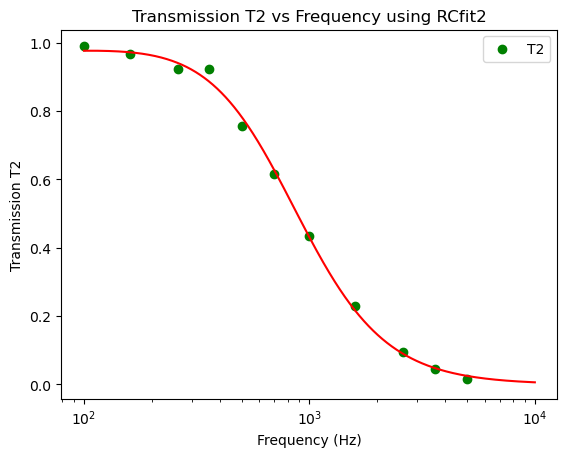

In [12]:
newx=np.arange(100,10000,1)
yfit=1/(popt[0]+popt[1]*newx+popt[2]*newx**2)
plt.scatter(f,T2, label='T2', color='green')
plt.xscale('log')
plt.title('Transmission T2 vs Frequency using RCfit2')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transmission T2')
plt.legend()
plt.plot(newx,yfit,'r',label='fit')
plt.xscale('log')
plt.show()

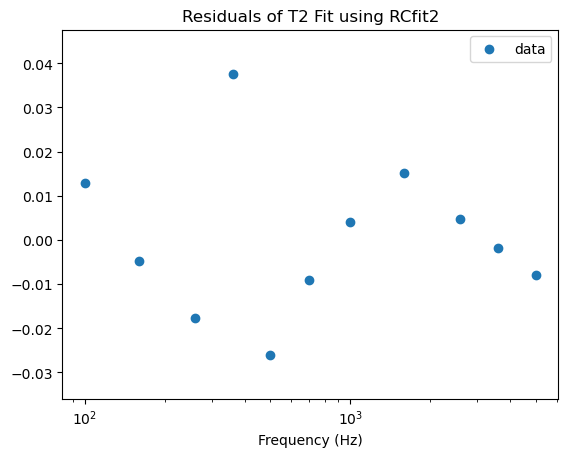

In [13]:
fitatx=RCfit2(f,*popt)
res=T2-fitatx
plt.scatter(f,res,marker='o',label='data')
plt.xscale('log')
plt.ylim(min(res)-0.01,max(res)+0.01)
plt.title('Residuals of T2 Fit using RCfit2')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()

In [16]:
def RCfit3(f, a, b, c, d):
    return 1/(a+b*(f+d)+c*(f+d)**2)
p0=1,1.0e-6,1.3e-6,0
popt,pcov=curve_fit(RCfit3, f, T2, p0, sigma=dT2)
print('a: ' +str(popt[0]) + 'b: ' + str(popt[1]) + ' c: ' + str(popt[2])+'d: '+str(popt[2]))
print('Errors(a,b,c,d): '+ str(np.sqrt(pcov.diagonal())))
print(popt+1.959964*np.sqrt(pcov.diagonal()))
print(popt-1.959964*np.sqrt(pcov.diagonal()))

a: 1.0400868870632574b: -0.0003179982283542303 c: 1.6233270186200285e-06d: 1.6233270186200285e-06
Errors(a,b,c,d): [1.97835600e+04 2.01983677e+02 2.07188994e-07 6.22127996e+07]
[3.87761055e+04 3.95880418e+02 2.02940999e-06 1.21934840e+08]
[-3.87740253e+04 -3.95881054e+02  1.21724405e-06 -1.21934855e+08]


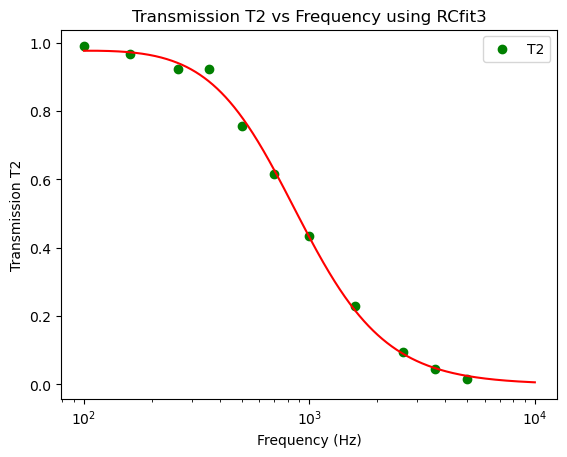

In [17]:
newx=np.arange(100,10000,1)
yfit=1/(popt[0]+popt[1]*(newx+popt[3])+popt[2]*(newx+popt[3])**2)
plt.scatter(f,T2, label='T2', color='green')
plt.xscale('log')
plt.title('Transmission T2 vs Frequency using RCfit3')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transmission T2')
plt.legend()
plt.plot(newx,yfit,'r',label='fit')
plt.xscale('log')
plt.show()


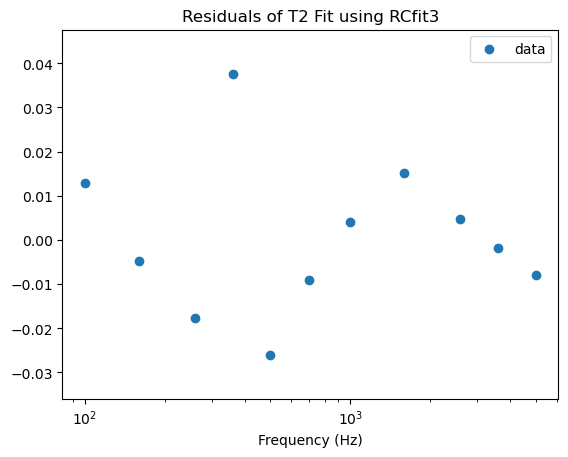

In [18]:
fitatx=RCfit3(f,*popt)
res=T2-fitatx
plt.scatter(f,res,marker='o',label='data')
plt.xscale('log')
plt.ylim(min(res)-0.01,max(res)+0.01)
plt.title('Residuals of T2 Fit using RCfit3')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()